# : Introduction: 
"WeRateDogs" is a project that is focused on how to collect data from different sources, assessing the collected data and cleaning it to make it easier for analysis and visualization process. "WE_RATE_DOGS" generally provide insight into how people react to posts on twetter of different dog breeds, other dog aspects aspects included are dog names and dog stages.

# : Define questions and goals.

## a) Goals.
The goal of this project is to wrangle "WeRateDogs" Twitter data and create interesting and trustworthy analyses and visualizations.
Some of the questions that will help us do the analysis and visualitions are listed below.

## b) Define the questions.
1. What type of dog stage receive most likes (favorite_count) when posted.?
2. Which dog stage received the most retweet?
3. Which dog stages is the most popularly posted?
4. Identify dog breeds with the highest numerator ratings?
5. Which dog breeds are the most retweeted?
6. Determine the most popular breeds of dogs posted?
7. Determine the top popular dog names from the data?
8. Which dog breeds received most likes (favorite_count)?
9. Determine the most popular dog names posted from the data?
10. Which dog breeds received most likes (favorite_count)?
11. What is the relationship between favorite_count and retweet_count?


## c) Determine the libs and import.
After understing what is required in the project, Determine the libraries required for the execution of tasks in the project and import them, since we will be using them through out our nalysis proces.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
#import the libraries to be used.
import pandas as pd
%matplotlib inline
import numpy as np
import requests
from matplotlib import pyplot as plt
from matplotlib import rcParams as rP
import seaborn as sns
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer





# : Data Wrangling.
Data wrangling is the process of acquiring data from different sources and making it more valuable and appropriate for analysis and visualizations through assessing and cleaning.

## a) Gathering the data
This is the process of collecting data and using pandas to read it into the dataframe.

### Read the `twitter-archive-enhanced.csv` data

In [3]:
# Read CSV (comma-separated) file into DataFrame usind pandas
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
folder_name = ('image_predictions.tsv')
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response


<Response [200]>

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
#check the content of the folder downloaded to ensure success
os.listdir(folder_name)

['image-predictions.tsv']

### Read the `image-predictions.tsv` data

In [7]:
# Read CSV (comma-separated) file into DataFrame usind pandas
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### Read the `tweets_df` data

In [9]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [11]:
#Creating an empty list
tweets_list = []
with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)
tweets_df = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [12]:
#Listing the 3 datasets collected.
tweets_df = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')









## b) Assessing Data
This is the stage where the gathered data goes through visual and programatic assessment to dertemine the quality and tidiness of our data. It helps determine the cleaning methods required before the data is fit for visualizations and analysis.

### a) tweets_df

In [13]:
#Read the data set for the tweets, which include; twitter, retweet_count and favorite_count
tweets_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [14]:
#Chech the data types of the column value of the tweet dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
#Checking the first 5 rows of the dataset.
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
#Checking the last 5 rows of the dataset.
tweets_df.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [18]:
len(tweets_df['id'].unique())

2354

In [19]:
#Check for the duplicated tweets in the tweets dataset
tweets_df['id'].duplicated().sum()

0

### b) twitter_archive_df

In [20]:
#Read the data set for the twitter archive data frame
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
len(twitter_archive_df['name'].unique())

957

In [22]:
# Display a basic summary of the DataFrame using .info, checking the data types of the columns.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
twitter_archive_df.loc[:, 'name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [24]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
#Check for the duplicated tweets in the twitter archive dataset
twitter_archive_df['tweet_id'].duplicated().sum()

0

In [26]:
#Checking 55 random rows for any issues in the dataset
twitter_archive_df.sample(55)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344...,4,10,None,None,None,None,None
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
1167,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721503162...,11,10,Panda,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,None,None
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,None,None,None,None
664,790723298204217344,NaN,NaN,2016-10-25 01:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Happy. He's a bathtub r...,7.899865e+17,4.196984e+09,2016-10-23 00:27:05 +0000,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None


In [27]:
twitter_archive_df[twitter_archive_df['retweeted_status_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### c) image_predictions_df

In [28]:
#Read the data set for the image prediction data sets.
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
image_predictions_df.iloc[:, 3]

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [32]:
# checking fo the total number of unique value in every column
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [33]:
#Listing the invalid data that does not have dog breeds and name it 'image_predictions_1'
image_predictions_1=image_predictions_df[image_predictions_df['p1_dog']==False]
#check to confirm success
image_predictions_1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [34]:
image_predictions_1.p1.value_counts()

seat_belt        22
web_site         19
teddy            18
dingo             9
tennis_ball       9
                 ..
walking_stick     1
book_jacket       1
rain_barrel       1
guenon            1
orange            1
Name: p1, Length: 267, dtype: int64

## Quality Issues
List the quality issues identified while assessing the data.
###### `twitter_archive` data
- Missing values (NaN)
- Presence of 'None' entries
- Misrepresentation of some dog names as 'a', 'none', 'an', 'the'....
- Unnecessary data in columns ("in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns)
- Non descriptive column headers, "text", "name"..... 
- tweet_id is registered as a integer instead of a string in `twitter_archive`
- Multiple columns which should have been represented as strings are represented as floats i.e "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" and "retweeted_status_user_id"

###### `image_predictions` data
- Mixing of lowercase and uppercase of names in column "p1", "p2" and "p3"
- tweet_id is registered as a integer instead of a string in `image_predictions`


###### `tweets_df` data
- None descriptive column header 'id'.
- The entries in the "id" column of the  `tweets_df` treated as an integer instead of a string


###### `Tidiness`
- Dog stages i.e doggo, floofer, pupper and puppo have been represented in 4 different columns in stead of one.  
- The tweet information is spread through 3 different data frames instead of one.
- Two datasets represented in one column instead of 2 i.e 'timestamp' has both date and time in the same column.
- Having same observations represented in 3 different columns i.e "p1" "p2" "p3" columns, p1_conf p2_conf p3_conf columns and p1_dog p2_dog p3_dog columns.


## c) Cleaning process
This is the stage where the collected data is corrected for any corrupt or inaccurate. This improves the quality and tidiness of the dataset and makes it easier for the exploratory data analysis stage.
For easier understanding of the process, its divided into 3 different stages.

#### Define:
- Define the issues detected.

#### Code
- Create a code to clean the issue.

#### Test
- Perform a test-run in the resulting code to see if the issue is fixed.


In [35]:
#Create copies of the collected dataframes
tweets_df_clean = tweets_df.copy()
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()




### None descriptive column headers, "text", "name"......in the twitter archive data frame 
#### Define
- Rename the 2 none descriptive columns in the data frame i.e 'name' renamed to 'dog_name' and 'text' renamed to 'text_tweeted'



#### Clean: Code 1

In [36]:
#Replacing the nondescriptive column names on the copy of the twitter archive data frames with more descriptive column names, ie 'name' to 'dog_name', 'text' to 'text_tweeted'. 
twitter_archive_df_clean = twitter_archive_df_clean.rename(columns={'name':'dog_name','text':'text_tweeted'})

#### Test

In [37]:
#Check to see for success.
twitter_archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### None descriptive column header 'id' in tweets_df. 
#### Define
- Rename the "id" column  to "tweet_id"



#### Clean: Code 2

In [38]:
#Replacing the nondescriptive column name on the copy of the tweets data frames with more descriptive column names, ie 'id' to 'tweet_id'. 
tweets_df_clean = tweets_df_clean.rename(columns={'id':'tweet_id'})

#### Test

In [39]:
#Check to confirm success
tweets_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Presence of retweets. 
#### Define
- Rename the rows with retweeted data in"twitter_archive_df"



#### Clean: Code 3

In [40]:
#Listing rows with none retwitted retweets and assigning them new data frame names.
df_twitter_archive_df_clean1 = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.isnull()]
df_twitter_archive_df_clean2 = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_user_id.isnull()]
df_twitter_archive_df_clean3 = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_timestamp.isnull()]

In [41]:
#Merge the 3 data sets formed asa a resupt of getting rid of the null retweets i.e df_twitter_archive_df_clean1, df_twitter_archive_df_clean2 and df_twitter_archive_df_clean3
df_twitter_archive_null=pd.concat([df_twitter_archive_df_clean1,df_twitter_archive_df_clean2,df_twitter_archive_df_clean3])

In [42]:
#Drop duplicated rows in the new dataset
df_twitter_archive_null.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

#### Test
- Perform a test-run in the resulting code to see if the issue is fixed.

In [43]:
df_twitter_archive_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Mixing of lowercase and uppercase of names in column "p1", "p2" and "p3" in `image_predictions` data
#### Define
- Convert all the names in columns p1, p2 and p3 to lowercase. 



#### Clean: Code 4

In [44]:
image_predictions_df_clean = image_predictions_df_clean[['tweet_id', 'jpg_url', 'img_num','p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog']]
image_predictions_df_clean.p1 = image_predictions_df_clean.p1.str.lower()
image_predictions_df_clean.p2 = image_predictions_df_clean.p2.str.lower()
image_predictions_df_clean.p3 = image_predictions_df_clean.p3.str.lower()

In [45]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [46]:
image_predictions_df_clean.sample(55)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,pembroke,0.969400,True,cardigan,0.026059,True,chihuahua,0.003505,True
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,pomeranian,0.382234,True,chow,0.208302,True,sunglasses,0.131328,False
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,arctic_fox,0.119243,False,labrador_retriever,0.099965,True,pug,0.086717,True
580,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
739,687127927494963200,https://pbs.twimg.com/media/CYkrNIVWcAMswmP.jpg,1,pug,0.178205,True,chihuahua,0.149164,True,shih-tzu,0.120505,True
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
1454,777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,chihuahua,0.988412,True,mexican_hairless,0.004177,True,hog,0.001507,False


### Presence of 'None' entries 
#### Define
- Replace all the 'None' with NaN in twitter_archive_df_clean



#### Clean: Code 5

In [47]:
twitter_archive_df_clean = twitter_archive_df_clean.replace('None',np.NaN)

#### Test

In [48]:
twitter_archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


### tweet_id is registered as a interger intead of a string in `image_predictions_df`, `twitter_archive_df` and `tweets_df`
#### Define
- Change the 'tweet_id' columns in all the 3 datasets from an int data type to a string datatype



#### Clean: Code 6

In [49]:
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype('str')
twitter_archive_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype('str')
image_predictions_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype('str')

#### Test

In [50]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [51]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text_tweeted                2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  dog_name                    1611 non-null   object 
 13  doggo                       97 no

In [52]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Dog stages i.e doggo, floofer, pupper and puppo have been repsented in 4 different columns in stead of one. 
#### Define
- Create a new column named 'dog_stage' and combine the data in the individual columns ('doggo','floofer','pupper','puppo') into the new column created.



#### Clean: Code 7

In [53]:
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean[twitter_archive_df_clean.columns[13:]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)
twitter_archive_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [54]:
twitter_archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666033412701032449,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,
2352,666029285002620928,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666020888022790149,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,
2354,NaN,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,


### Missrepresentation of some dog names as 'a', 'none', 'an', 'the'.... 

In [55]:
y=['a', 'none', 'an', 'the']
df_y=twitter_archive_df_clean[twitter_archive_df_clean.dog_name.isin(y)]
df_y

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
56,881268444196462592,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper
649,792883833364439040,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,
759,778383385161035776,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,
801,772193107915964416,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,
1002,747816857231626240,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,
2350,666044226329800704,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,
2352,666029285002620928,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666020888022790149,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,


#### Define
- Replace the the missrepresented dog names ie ('a', 'none', 'an' and 'the') with NaN.



#### Clean: Code 8

In [56]:
misspelt_names = ['a', 'none', 'an', 'the']
for phrase in misspelt_names:
    twitter_archive_df_clean.dog_name.replace( phrase , np.NaN, inplace=True)

#### Test

In [57]:
twitter_archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_tweeted,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666033412701032449,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,
2352,666029285002620928,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,
2353,666020888022790149,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,
2354,NaN,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,


### Unnecessary data in columns ("in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns) in `twitter_archive` dataset
#### Define
- Drop the unwanted columns in the twitter archive dataset i.e ("in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns)



#### Clean: Code 9

In [58]:
#Drop rows with  invalid data that does not have dog breeds(p1=false) and and remain with rows with only dog breeds(p1=True)
twitter_archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [59]:
twitter_archive_df_clean

,tweet_id,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...
2351,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,
2352,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,
2353,666020888022790149,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,
2354,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,


### Some columns have multiple values instead of one in `twitter_archive_df_clean` dataset
#### Define
- Split the multiple values in the column of dog stage to have one value for each cell in the column.

In [60]:
#Checking the unique values to the the multiple values in one column.
twitter_archive_df_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### Clean: Code 10

In [61]:
# assign data with one value in the "dog_stage" coumn to df3
x=['', 'doggo', 'puppo', 'pupper', 'floofer']
df3=twitter_archive_df_clean[twitter_archive_df_clean.dog_stage.isin(x)]

In [62]:
# assign data with two values in the "dog_stage" coumn to df1
x=['doggo,puppo','doggo,floofer', 'doggo,pupper']
df1=twitter_archive_df_clean[twitter_archive_df_clean.dog_stage.isin(x)]

In [63]:
#Split the dog staged combined in one cell
df1[['first_dog_stage','second_dog_stage']]=df1['dog_stage'].str.split(',', expand=True);
#Drop 'dog_stage' column
df1.drop(['dog_stage'], axis=1, inplace=True);

#### Test

In [64]:
df1

,tweet_id,source,text_tweeted,rating_numerator,rating_denominator,dog_name,first_dog_stage,second_dog_stage
191,855818117272018944,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,puppo
200,853760880890318849,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,NaN,doggo,floofer
460,817536400337801217,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,pupper
531,808001312164028416,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggo,pupper
565,802247111496568832,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggo,pupper
575,800859414831898624,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,doggo,pupper
705,785533386513321988,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,pupper
733,781251288990355457,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,NaN,doggo,pupper
778,775842724423557120,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",12,10,NaN,doggo,pupper
822,769940425801170949,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,12,10,just,doggo,pupper


In [65]:
#Melt the 2 newly (first_dog_stage and second_dog_stage) formed column into one (dog_stage)
df2=df1.melt(id_vars = ['tweet_id','source','text_tweeted','rating_numerator','rating_denominator','dog_name'],
                               value_vars = ['first_dog_stage','second_dog_stage'],
                               var_name = 'identifier',
                               value_name = 'dog_stage')

In [66]:
#Drop 'identifier' column after melting the 2 dcolumns
df2.drop(['identifier'], axis=1, inplace=True);

In [67]:
#Merge df2 and df3
df_twitter_archive_df_clean=pd.concat([df2,df3])


#### Test

In [68]:
df_twitter_archive_df_clean

,tweet_id,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage
0,855818117272018944,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo
1,853760880890318849,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,NaN,doggo
2,817536400337801217,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo
3,808001312164028416,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggo
4,802247111496568832,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggo
...,...,...,...,...,...,...,...
2351,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,
2352,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,
2353,666020888022790149,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,
2354,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,


In [69]:
#Checking to confirm "dog_stage" column has only 1 entry in every cell
df_twitter_archive_df_clean.dog_stage.unique()

array(['doggo', 'puppo', 'floofer', 'pupper', ''], dtype=object)

### each variable is not in its column and each observation not in its row.
#### Define
- Combine relating columns in the image_predictions_df_clean dataset ie [p1,p2,p3]-1st column, [p1_conf,p2_conf,p3_con1]-2nd column and [p1_dog,p2_dog,p3_dog]-3rd columns respectively.



#### Clean: Code 11

In [70]:
img_prediction1=image_predictions_df_clean.melt(id_vars = ['tweet_id','jpg_url', 'img_num'],
                               value_vars = ['p1','p2','p3'],
                               var_name = 'Predictions',
                               value_name = 'dog_breeds')

img_prediction2=image_predictions_df_clean.melt(id_vars = ['tweet_id','jpg_url', 'img_num'],
                               value_vars = ['p1_dog','p2_dog','p3_dog'],
                               var_name = 'Predictions_count',
                               value_name = 'outcome')
#Merge the 2 datasets
df_clean=pd.merge(img_prediction1,img_prediction2)
image_preds_df_clean=df_clean.drop(index=df_clean[df_clean['outcome']==False].index)

In [71]:
image_preds_df_clean=df_clean.drop(index=df_clean[df_clean['outcome']==False].index)


#### Test

In [72]:
image_preds_df_clean

,tweet_id,jpg_url,img_num,Predictions,dog_breeds,Predictions_count,outcome
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p1_dog,True
1,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p2_dog,True
2,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p3_dog,True
3,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,p1_dog,True
4,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,p2_dog,True
...,...,...,...,...,...,...,...
18661,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,pekinese,p2_dog,True
18662,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,pekinese,p3_dog,True
18663,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p1_dog,True
18664,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p2_dog,True


In [73]:
image_preds_df_clean['tweet_id'].drop_duplicates()

0        892420643555336193
9        892177421306343426
18       891815181378084864
27       891689557279858688
36       891327558926688256
                ...        
18621    671115716440031232
18630    671109016219725825
18640    670995969505435648
18648    670842764863651840
18657    670840546554966016
Name: tweet_id, Length: 1751, dtype: object

In [74]:
#Drop rows with non-dog beed enteries (outcome column=False)
image_preds_df_clean=image_preds_df_clean.drop(index=image_preds_df_clean[image_preds_df_clean['outcome']==False].index)
image_preds_df_clean

,tweet_id,jpg_url,img_num,Predictions,dog_breeds,Predictions_count,outcome
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p1_dog,True
1,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p2_dog,True
2,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,welsh_springer_spaniel,p3_dog,True
3,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,p1_dog,True
4,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,p2_dog,True
...,...,...,...,...,...,...,...
18661,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,pekinese,p2_dog,True
18662,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,pekinese,p3_dog,True
18663,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p1_dog,True
18664,670840546554966016,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p2_dog,True


In [75]:
#Drop duplicated rows in the new dataset
image_preds_df_clean.drop_duplicates(subset='tweet_id', keep='first', inplace=True)
#Delete unnecessary columns that we will not use for analysis
image_preds_df_clean.drop(['img_num', 'Predictions','outcome', 'Predictions_count'], axis=1, inplace=True)

In [76]:
image_preds_df_clean

,tweet_id,jpg_url,dog_breeds
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel
9,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
18,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd
27,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback
36,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
...,...,...,...
18621,671115716440031232,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever
18630,671109016219725825,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
18640,670995969505435648,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
18648,670842764863651840,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua


# : Data storage, (EDA) and Visualizations.
This is the stage where one creates insights uncovers the underlying structures, extract variables, detect outliers and test assumptions, develop models and  determine optimal factors in a dataset.

## `Merge all the 3 datasets`
- a)image_preds_df_clean
- b)df_twitter_archive_df_clean
- c)tweets_df_clean


In [77]:
df_twitter_archive_df_clean

,tweet_id,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage
0,855818117272018944,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo
1,853760880890318849,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,NaN,doggo
2,817536400337801217,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo
3,808001312164028416,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggo
4,802247111496568832,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggo
...,...,...,...,...,...,...,...
2351,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,
2352,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,
2353,666020888022790149,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,
2354,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,


In [78]:
#1st merge: merge twitter_archive_df_clean to mage_preds_df_clean
first_merge_df=image_preds_df_clean.merge(df_twitter_archive_df_clean,left_on='tweet_id', right_on='tweet_id', how='left')
#2nd merge: merge tweets_df_clean to first_merge_dfmerge_df=image_preds_df_clean.merge(twitter_archive_df_clean,left_on='tweet_id', right_on='tweet_id', how='left')
merged_df = first_merge_df.merge(tweets_df_clean,left_on='tweet_id', right_on='tweet_id', how='left')


In [79]:
merged_df

,tweet_id,jpg_url,dog_breeds,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,8853,39467
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,6514,33819
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,4328,25461
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,8964,42908
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...
1758,671115716440031232,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,8,10,Clarence,,842,1436
1759,671109016219725825,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,4,10,NaN,,478,1225
1760,670995969505435648,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",6,10,Phred,,317,1175
1761,670842764863651840,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,8,10,Toby,,4324,7989


In [80]:
merged_df.shape

(1763, 11)

In [81]:
#Listing rows with data that is not dog breed
x=['comic_book',"jack-o'-lantern",'ox']
df1=merged_df[merged_df.dog_breeds.isin(x)]

In [82]:
df1

,tweet_id,jpg_url,dog_breeds,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
18,887473957103951883,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,ox,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,,18781,69871
113,863471782782697472,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,ox,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a backpup vocalist for t...,13,10,Neptune,,2687,0
185,846874817362120707,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,jack-o'-lantern,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,11,10,NaN,,4404,21685
312,822872901745569793,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,jack-o'-lantern,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,12,10,Albus,,48265,132810
846,744234799360020481,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,comic_book,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,10,10,Harvey,,79515,131075
1295,689154315265683456,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,jack-o'-lantern,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,10,10,Lucky,,1128,3348


In [83]:
#Deleting rows with data that is not dog breed
merged_df.drop([18,113,185,312,846,1295], axis=0, inplace=True);

In [84]:
merged_df.shape

(1757, 11)

## Iteration
The cleaning precess is an iterable process and most oftenly one will find themselves making correcrion to the cleaned data set or even clean the resulting clean datasets after doing the merging.

#### Define 
- Create a copy of the new merged dataFrame and name it `new_merege_df`

#### Code 

In [85]:
new_merge_df = merged_df.copy()

In [86]:
new_merge_df

,tweet_id,jpg_url,dog_breeds,source,text_tweeted,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,8853,39467
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,6514,33819
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,4328,25461
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,8964,42908
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...
1758,671115716440031232,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,8,10,Clarence,,842,1436
1759,671109016219725825,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,4,10,NaN,,478,1225
1760,670995969505435648,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",6,10,Phred,,317,1175
1761,670842764863651840,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,8,10,Toby,,4324,7989


In [87]:
new_merge_df.shape

(1757, 11)

In [88]:
new_merge_df.dog_name.value_counts()

Cooper     11
Lucy       10
Charlie    10
Oliver     10
Penny       8
           ..
Dixie       1
Fizz        1
Davey       1
Willem      1
Holly       1
Name: dog_name, Length: 765, dtype: int64

#### Define 
- Drop clumns 'jpg_url', 'source' and 'text_tweeted' and rename the new data with less statment for earsier analysis and visualization, name it 'new_merege_df'

#### Code 

In [89]:
new_merge_df.drop(['jpg_url', 'source', 'text_tweeted'], axis=1, inplace=True)

#### Test

In [90]:
new_merge_df

,tweet_id,dog_breeds,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,welsh_springer_spaniel,13,10,Phineas,,8853,39467
1,892177421306343426,redbone,13,10,Tilly,,6514,33819
2,891815181378084864,german_shepherd,12,10,Archie,,4328,25461
3,891689557279858688,rhodesian_ridgeback,13,10,Darla,,8964,42908
4,891327558926688256,miniature_pinscher,12,10,Franklin,,9774,41048
...,...,...,...,...,...,...,...,...
1758,671115716440031232,chesapeake_bay_retriever,8,10,Clarence,,842,1436
1759,671109016219725825,basset,4,10,NaN,,478,1225
1760,670995969505435648,paper_towel,6,10,Phred,,317,1175
1761,670842764863651840,chihuahua,8,10,Toby,,4324,7989


In [91]:
new_merge_df[new_merge_df['rating_numerator']>12]

,tweet_id,dog_breeds,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,welsh_springer_spaniel,13,10,Phineas,,8853,39467
1,892177421306343426,redbone,13,10,Tilly,,6514,33819
3,891689557279858688,rhodesian_ridgeback,13,10,Darla,,8964,42908
5,891087950875897856,bernese_mountain_dog,13,10,NaN,,3261,20562
6,890729181411237888,chow,13,10,NaN,,16716,56848
...,...,...,...,...,...,...,...,...
1617,674307341513269249,black-and-tan_coonhound,13,10,NaN,,7641,12129
1650,673656262056419329,eskimo_dog,13,10,Shnuggles,,265,769
1721,671763349865160704,eskimo_dog,13,10,space,,999,1788
1727,671550332464455680,pembroke,13,10,NaN,,229,967


In [92]:
new_merge_df.shape

(1757, 8)

## :Data storage

In [93]:
#Storing the new cleaned merged datasets as 'twitter_archive_master.csv'.
new_merge_df.to_csv('twitter_archive_master.csv' ,index = False)

## :Visualization

### Questions to be addresses in the new merged data, to provide insights in the copy of the merged data frames  `new_merge_df`
1. What type of dog stage receive most likes (favorite_count) when posted.?
2. Which dog stage received the most retweeted?
3. Which dog stages is the most popularly posted?
4. Identify dog breeds with the highest numerator ratings?
5. Which dog breeds are the most retweeted?
6. Determine the most popular breeds of dogs posted?
7. Determine the top popular dog names from the data?
8. Which dog breeds received most likes (favorite_count)?
9. Determine the most popular dog names posted from the data?
10. Which dog breeds received most likes (favorite_count)?
11. What is the relationship between favorite_count and retweet_count?


In [94]:
new_merge_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1757.000000,1757.000000,1757.000000,1757.000000
mean,13.731360,10.572567,3339.167900,8730.652248
std,51.997389,7.668829,4964.949278,11174.560200
min,0.000000,0.000000,2.000000,0.000000
25%,10.000000,10.000000,823.000000,2176.000000
50%,11.000000,10.000000,1722.000000,4228.000000
75%,12.000000,10.000000,3911.000000,11271.000000
max,1776.000000,170.000000,56625.000000,107956.000000


In [95]:
#create functions for the graphs
def labler_fn(xaxis, yaxis, title):
    xaxis = plt.xlabel(xaxis)
    yaxis = plt.ylabel(yaxis)
    title = plt.title(title)
    
def bar(x, y, xaxis, yaxis, title):
    plt.bar(x, y,)
    labler_fn(xaxis, yaxis, title)
plt.show()

def hist(x, xaxis, yaxis, title):
    plt.hist(x)
    labler_fn(xaxis, yaxis, title)
plt.show()

a=['x','y','z']
def url(jpg_url):
    img_link = merged_df[merged_df.jpg_url == jpg_url]
    img_link = img_link.loc[:,a]
    return img_link

In [96]:
a=['dog_name','dog_stage','text_tweeted']
#Checking how many dog breeds we have.
new_merge_df['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'floofer', 'pupper'], dtype=object)

#### Question 1:
What type of dog stage receive most likes (favorite_count) when posted.

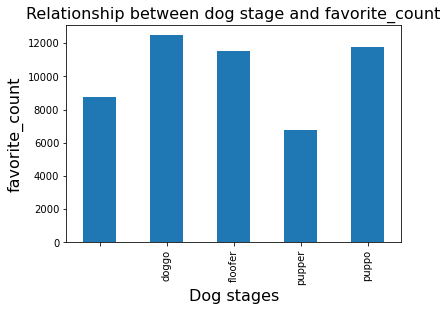

In [97]:
#plot a graph showing dog_stage with number of likes (favorite_count).
new_merge_df.groupby('dog_stage',).favorite_count.mean().plot(kind='bar')
plt.ylabel('favorite_count', fontsize = 16);
plt.xlabel('Dog stages', fontsize = 16)
plt.title('Relationship between dog stage and favorite_count', fontsize = 16);

In [98]:
url('https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg')

,dog_name,dog_stage,text_tweeted
977,Otis,,This is Otis. Everybody look at Otis. 12/10 wo...


![title](https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg)

In [99]:
url('https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg')

,dog_name,dog_stage,text_tweeted
961,Jangle,,This is Jangle. She's addicted to broccoli. It...


![title](https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg)

From the above observation the analysis clearly shows that the doggo, puppo and fluffer are the most liked dog stages since they received the highest likes in the "WeRateDogs" twitter report, followed by pupper.The 1st bar shows dogs that were twitted without listing their dog stage.

#### Question 2:
Which dog stage received the most retweet?

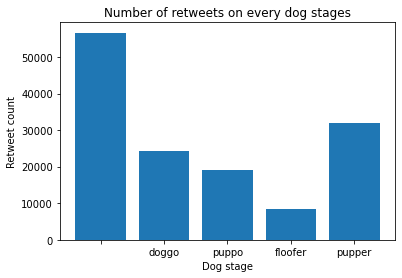

In [100]:
#plot a bar graph to comparing the number of retweets each dog stage received.
bar(new_merge_df.dog_stage, new_merge_df.retweet_count, 'Dog stage', 'Retweet count', 'Number of retweets on every dog stages')


In [101]:
url('https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg')

,dog_name,dog_stage,text_tweeted
952,Fred,,This is Fred-Rick. He dabbles in parkour. The ...
1201,NaN,,After reading the comments I may have overesti...


![title](https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg)

In [102]:
url('https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg')

,dog_name,dog_stage,text_tweeted
1121,Stanley,,Meet Stanley. He's an inverted Uzbekistani wat...


![title](https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg)

The graph above depics that the most retweeted dog stage is pupper followed by doggo and then puppo. since the highest is a bar representing retweets for dogs whose stage was not defined.

#### Question 3:
Which dog stages is the most tweeted?


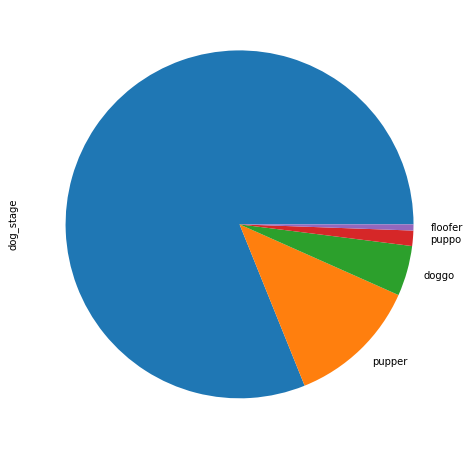

In [103]:
#plot a pie chart showing the popular dog stages twisted.
new_merge_df.dog_stage.value_counts().plot(kind = 'pie', figsize = (10, 8));

In [104]:
url('https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg')

,dog_name,dog_stage,text_tweeted
345,Florence,,This is Florence. He saw the same snap you sen...


![title](https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg)

In [105]:
url('https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg')

,dog_name,dog_stage,text_tweeted
1720,NaN,,Remarkable dog here. Walks on back legs really...


![title](https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg)

The pie chart shows the data on what dog stage is popularly posted on twitter, and from the observation pupper appears to be the most popular amonng the dogs that had their stage defined followed by doggo.

#### Question 4:
Identify dog stage with the highest numerator ratings


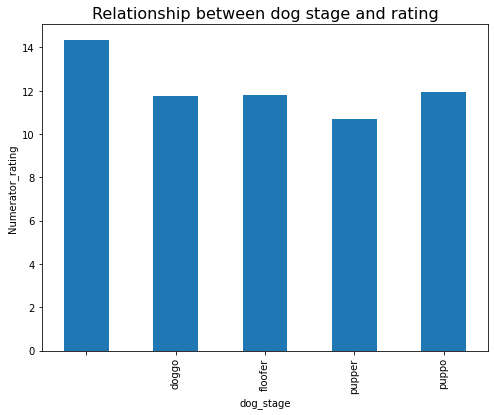

In [106]:
#plot a graph showing dog_stage with Numerator_rating.
new_merge_df.groupby('dog_stage').rating_numerator.mean().plot(kind='bar', figsize = (8, 6))
plt.ylabel('Numerator_rating');
plt.title('Relationship between dog stage and rating', fontsize = 16);

In [107]:
url('https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg')

,dog_name,dog_stage,text_tweeted
1736,Jax,,Meet Jax. He's in the middle of a serious conv...


![title](https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg)

All dog stages have a rating above 10 which tends to agree with the statement 'unique rating system is a big part of the popularity of WeRateDogs'
This indicates that every dog no matter what stage they are is a great a dog.

#### Question 5:
Which dog breeds are the most retweeted?

In [108]:
a=['dog_name','dog_breeds','text_tweeted']

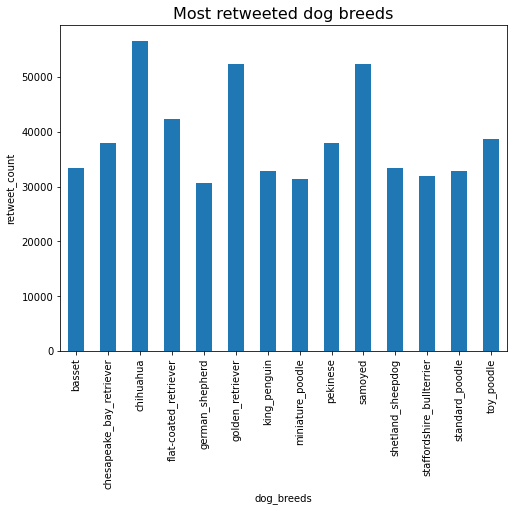

In [109]:
#this returns values with retweet_count above 30000
retweet_count_mean1 = new_merge_df[new_merge_df['retweet_count']>30000]
#Plot a bar graph showing the most retweeted dog breed.
retweet_count_mean1.groupby('dog_breeds').retweet_count.mean().plot(kind='bar', figsize = (8, 6))
plt.ylabel('retweet_count');
plt.title('Most retweeted dog breeds', fontsize = 16);

In [110]:
url('https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg')

,dog_name,dog_breeds,text_tweeted
1749,NaN,golden_retriever,This pup holds the secrets of the universe in ...


![title](https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg)

In [111]:
url('https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg')

,dog_name,dog_breeds,text_tweeted
1509,Sandy,labrador_retriever,This is Sandy. He's sexually confused. Thinks ...


![title](https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg)

The above graphs provides us with an observation that the most retweeted posts had chihuahua followed by samoyed then golden retriever breeds.

#### Question 6:
Determine the most popular breeds of dogs posted .

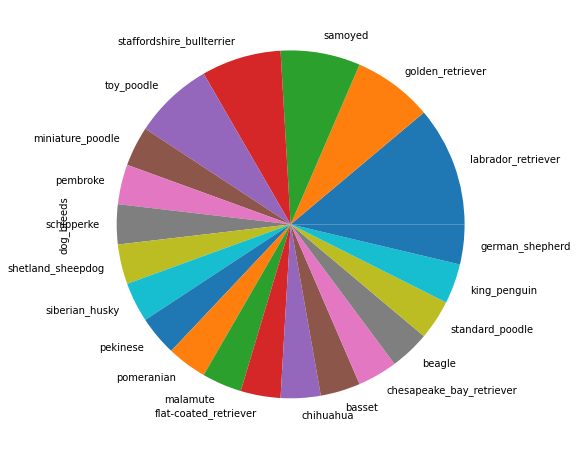

In [112]:
#this returns values with retweet_count above 20000
retweet_count_mean1 = new_merge_df[new_merge_df['retweet_count']>20000]
#plot a pie chart showing the popularity of dog breeds that appear on the highest retweets.
retweet_count_mean1.dog_breeds.value_counts().plot(kind = 'pie', figsize = (10, 8));

In [113]:
url('https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg')

,dog_name,dog_breeds,text_tweeted
545,Moose,chihuahua,This is Moose. He's rather h*ckin dangerous (y...


![title](https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg)

The graph above depics that the 3 most popular breeds of dogs posted on twitter are the labrader retriever, toy poodle, samoyed, staffordshire bull terrier, golden retriever and basset and chihuahua respectively. The popularity rate for other breeds seems to be almost at the same level.

#### Question 7:
Which dog breeds received most likes (favorite_count).

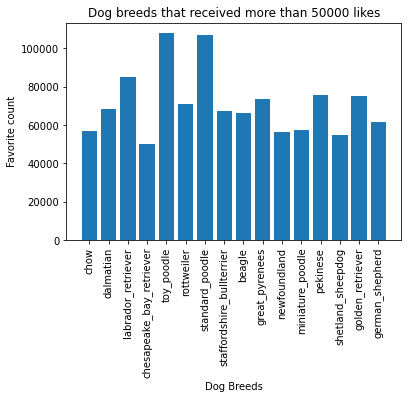

In [114]:
#this returns values with retweet_count above 50000
favorite_count_mean1 = new_merge_df[new_merge_df['favorite_count']>50000]
#plot a bar graph to showing the most liked dog breeds (50000 likes).
bar(favorite_count_mean1.dog_breeds, favorite_count_mean1.favorite_count, 'Dog Breeds', 'Favorite count', 'Dog breeds that received more than 50000 likes')
plt.xticks(rotation=90);

In [115]:
url('https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg')

,dog_name,dog_breeds,text_tweeted
153,NaN,chihuahua,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...


![title](https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg)

The visualization created in the above graphs shows the breeds of dogs that received most likes (above 50000). Toy poodle and standard poodle took the lead followed by labrador retriever then pekinese, golden retriever and great pyrenees.

#### Question 8:
Determine the most popular dog names posted from the data.

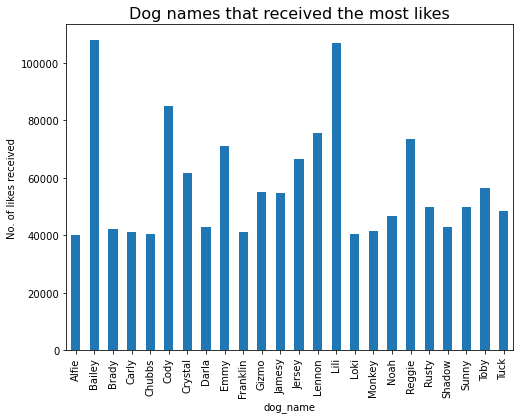

In [116]:
#this returns values with favorite_count above 40000
favorite_count1 = new_merge_df[new_merge_df['favorite_count']>40000]
#plot a graph showing popular dog names.
favorite_count1.groupby('dog_name').favorite_count.mean().plot(kind='bar', figsize = (8, 6))
plt.ylabel('No. of likes received');
plt.title('Dog names that received the most likes', fontsize = 16);

In [117]:
url('https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg')

,dog_name,dog_breeds,text_tweeted
637,NaN,bernese_mountain_dog,Guys this is getting so out of hand. We only r...


![title](https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg)

![title](https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg)

The visualization from the above graph shows that the names of dogs that received highest number of likes when they were posted are, Bailey, Lili, Cody, Lennon, Reggie, Emmy....respectively.

#### Question 9:
What is the relationship between favorite_count and retweet_count.

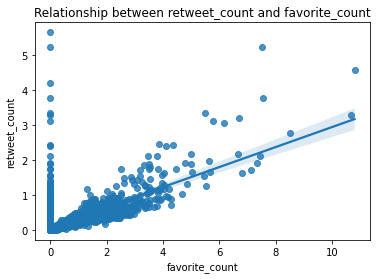

In [118]:
#Plot a graph showing relationship between retweet_count and favorite_count
sns.regplot(new_merge_df.favorite_count/10000,new_merge_df.retweet_count/10000)
plt.title('Relationship between retweet_count and favorite_count');

From the graph above, we can observe that there is a positive corelation between the number of likes a post will receive and if the post will be retweered.

# : Assumptions and conclusions

## a) General Observations.
The highest likes on dog stage was received by doggo, puppo and fluffer respectively.
While the most retweeted was pupper doggo and puppo respectively.

Hence Doggo seems to be the most popular dog stage  since it appears to rate among the top in the most liked and most retweeted in the twitter posts despite pupper being the most twitted.

Analysis on dog breeds indicate that chihuahua was the most retweeted breed followed by golden retriever and then samoyed, 
While the most posted breeds on twitter are the labrader retriever, golden retriever, samoyed, staffordshire bull terrier and toy poodle respectively. 
Toy poodle and standard poodle are the most liked breeds followed by labrador retriever then pekinese, golden retriever and great pyrenees respectively.

From this observation is safe to say the golden retriever is the most popular breed since it always find itself among the top for the most liked and and most retweeted breed.

From the analysis we can tell that among the most posted dogs, there are names that are more recurrent and these famous dog names include Bailey, Lili, Cody, Lennon, Reggie, Emmy just to mention a few, bailey being the most posted.


## c) Conclusion.


From the above analysis we can make the following conclusions;
- The number of retweets tends to rise with the number of likes on a tweet.
- Doggo is the most popular dog stage since it  ranks higherest for likes and retweets.
- Golden retriever seems to be the most popular dog breeds since it always find a way to make it to top 5 of the list (likes  and retweets).